In [1]:
import ast
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [7]:


data_dict = {}

with open("dataset.txt", "r", encoding="utf-8") as f:
    lines = f.readlines()

pattern = r'^\s*([\'"]?)(.+?)\1\s*:\s*(True|False)\s*,?\s*$'

for line in lines:
    match = re.match(pattern, line.strip())
    if match:
        text = match.group(2)
        label = True if match.group(3) == "True" else False
        data_dict[text] = label

print(f"Parsed {len(data_dict)} entries successfully.")

df = pd.DataFrame(list(data_dict.items()), columns=["text", "label"])
print(df.head())


Parsed 674 entries successfully.
                                                text  label
0  {'Imagine how many have done this already and ...  False
1  JW filed a FOIA lawsuit against State Treasury...  False
2  I am curious as to how many priests impregnant...  False
3  Should read blames Obama, diminishes the intel...  False
4  Global Payroll Specialist Assistant Manager, D...  False



Label distribution:
label
False    589
True      85
Name: count, dtype: int64


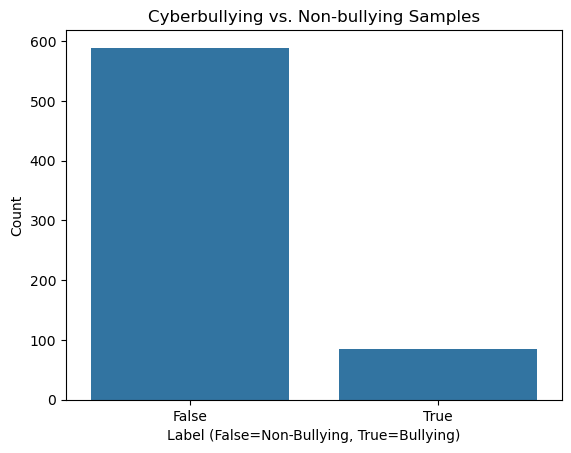

In [9]:
print("\nLabel distribution:")
print(df["label"].value_counts())

sns.countplot(x=df["label"])
plt.title("Cyberbullying vs. Non-bullying Samples")
plt.xlabel("Label (False=Non-Bullying, True=Bullying)")
plt.ylabel("Count")
plt.show()

In [11]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)        # remove URLs
    text = re.sub(r"[^\w\s]", "", text)        # remove punctuation
    text = re.sub(r"\s+", " ", text).strip()   # remove extra whitespace
    return text

df["clean_text"] = df["text"].apply(clean_text)
print("\nCleaned text sample:")
print(df[["text", "clean_text"]].head())


Cleaned text sample:
                                                text  \
0  {'Imagine how many have done this already and ...   
1  JW filed a FOIA lawsuit against State Treasury...   
2  I am curious as to how many priests impregnant...   
3  Should read blames Obama, diminishes the intel...   
4  Global Payroll Specialist Assistant Manager, D...   

                                          clean_text  
0  imagine how many have done this already and go...  
1  jw filed a foia lawsuit against state treasury...  
2  i am curious as to how many priests impregnant...  
3  should read blames obama diminishes the intell...  
4  global payroll specialist assistant manager du...  


In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    df["clean_text"],
    df["label"],
    test_size=0.2,
    stratify=df["label"],
    random_state=42
)

print(f"\nTraining samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 539, Testing samples: 135


In [15]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("\nTF-IDF vectorization complete.")



TF-IDF vectorization complete.


In [17]:
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_vec, y_train)
print("\nModel training complete.")


Model training complete.



Classification Report:
              precision    recall  f1-score   support

Non-Bullying       0.87      0.99      0.93       118
    Bullying       0.00      0.00      0.00        17

    accuracy                           0.87       135
   macro avg       0.44      0.50      0.46       135
weighted avg       0.76      0.87      0.81       135



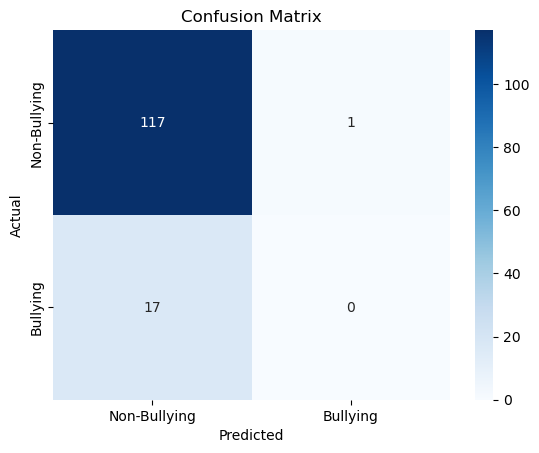

In [19]:
y_pred = clf.predict(X_test_vec)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Non-Bullying", "Bullying"]))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Bullying", "Bullying"], yticklabels=["Non-Bullying", "Bullying"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [21]:
with open("logistic_model.pkl", "wb") as model_file:
    pickle.dump(clf, model_file)

with open("tfidf_vectorizer.pkl", "wb") as vec_file:
    pickle.dump(vectorizer, vec_file)

print("\n✅ Model and vectorizer saved as 'logistic_model.pkl' and 'tfidf_vectorizer.pkl'.")



✅ Model and vectorizer saved as 'logistic_model.pkl' and 'tfidf_vectorizer.pkl'.
